In [3]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
import algorithms as alg
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

plt.style.use("seaborn")

<IPython.core.display.Javascript object>

## Задание: какое наилучшее количество кластеров для нанной выборки
Нашел инициализацию данных точек(какая на картинке с презентации) у вас на гитхабе:)

(-10, 10)

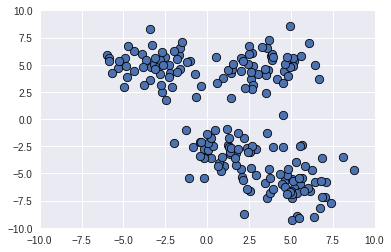

<IPython.core.display.Javascript object>

In [27]:
# code from github.com/Dyakonov
seed = 10
n_data = 200
n_clusters = 4
n_centers = 4

blobs, blob_labels = datasets.make_blobs(
    n_samples=n_data, n_features=2, centers=n_centers, random_state=seed, cluster_std=2
)

blobs *= 0.75
blobs += 1.1

plt.figure(figsize=(6, 4))
plt.scatter(blobs[:, 0], blobs[:, 1], s=70, edgecolors="black", linewidth=0.8)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

### Определим количество кластеров с помощью метода силуэтов

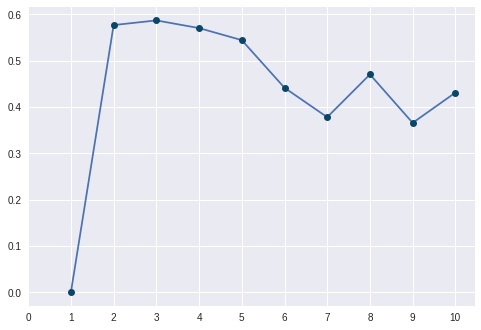

<IPython.core.display.Javascript object>

In [6]:
x = []
y = []
k = 10
for i in range(1, k + 1):
    K = alg.Kmeans(n_clusters=i, select="k-means++", n_init=10, max_iter=300)
    K.calc(blobs)
    x.append(i)
    y.append(alg.silhouette(blobs, K.labels))
plt.plot(x, y)
plt.plot(x, y, "o", color="#0a4766")
plt.xticks(np.arange(0, k + 1, 1.0))
plt.show()

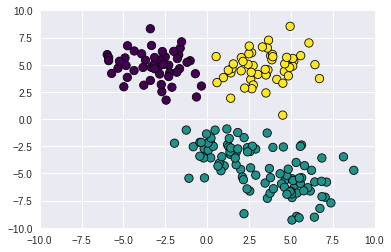

<IPython.core.display.Javascript object>

In [29]:
K = alg.Kmeans(n_clusters=3, select="k-means++", n_init=10, max_iter=300).calc(blobs)
plt.figure(figsize=(6, 4))
plt.scatter(
    blobs[:, 0],
    blobs[:, 1],
    s=70,
    c=K.labels,
    edgecolors="black",
    cmap="viridis",
    linewidth=0.8,
)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

## Исследование зависимости от начальной инициализации 
Видно, что при рандомном выборе точек все может сойтись к локальному минимуму целевой функции и кластеризация не будет успешной. Решается увеличением количества инициализаций кластеров или с помощью k-means++

In [8]:
X1, Y1 = datasets.make_blobs(
    n_samples=120,
    n_features=2,
    centers=[[0, 0], [1.5, 2], [2, 0], [0, 2]],
    center_box=(-1, 1),
    cluster_std=0.25,
    random_state=0,
)

<IPython.core.display.Javascript object>

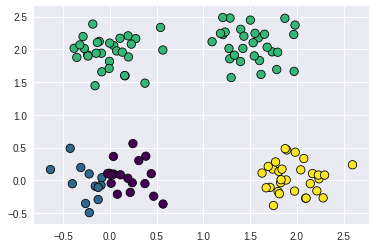

<IPython.core.display.Javascript object>

In [9]:
K = alg.Kmeans(
    n_clusters=4, select="random", n_init=1, max_iter=100, random_state=11
).calc(X1)
plt.figure(figsize=(6, 4))
plt.scatter(
    X1[:, 0],
    X1[:, 1],
    s=70,
    c=K.labels,
    cmap="viridis",
    edgecolors="black",
    linewidth=0.8,
)
plt.show()

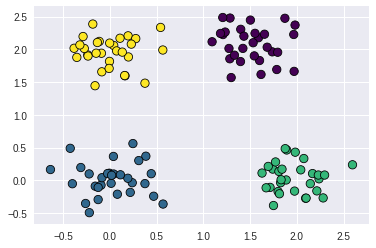

<IPython.core.display.Javascript object>

In [10]:
K = alg.Kmeans(
    n_clusters=4, select="k-means++", n_init=1, max_iter=100, random_state=False
).calc(X1)
plt.figure(figsize=(6, 4))
plt.scatter(
    X1[:, 0],
    X1[:, 1],
    s=70,
    c=K.labels,
    edgecolors="black",
    cmap="viridis",
    linewidth=0.8,
)
plt.show()

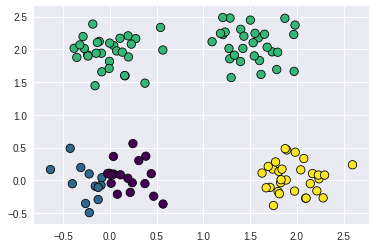

<IPython.core.display.Javascript object>

In [23]:
# задаю кластеры самостоятельно
K = alg.Kmeans(
    n_clusters=[[0, 0], [-0.7, -0.5], [1.4, 2.0], [2, 0]],
    select="",
    n_init=1,
    max_iter=100,
    random_state=False,
).calc(X1)
plt.figure(figsize=(6, 4))
plt.scatter(
    X1[:, 0],
    X1[:, 1],
    s=70,
    c=K.labels,
    edgecolors="black",
    cmap="viridis",
    linewidth=0.8,
)
plt.show()

## Для каких задач подходит
Так как k-means использует евклидову метрику и другая ему не подходит, то на кластерах, которые совсем не похожи на шарообразные окрестности метод будет работать плохо.

In [12]:
X2, Y2 = datasets.make_circles(n_samples=200, noise=0.07, factor=0.4)
X3, Y3 = datasets.make_moons(n_samples=200, noise=0.07)

<IPython.core.display.Javascript object>

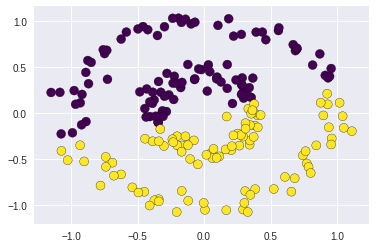

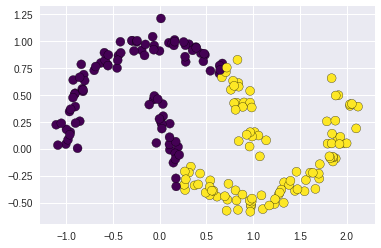

<IPython.core.display.Javascript object>

In [18]:
K = alg.Kmeans(n_clusters=2).calc(X2)

plt.figure(figsize=(6, 4))
plt.scatter(X2[:, 0], X2[:, 1], s=80, c=K.labels, edgecolor="black", cmap="viridis")

K = alg.Kmeans(n_clusters=2).calc(X3)

plt.subplot()
plt.figure(figsize=(6, 4))
plt.scatter(X3[:, 0], X3[:, 1], s=80, c=K.labels, edgecolor="black", cmap="viridis")
plt.plot()
plt.show()

## Сложность
Время настройки пропорционально числу кластеров - k , длине выборки - n, размерности векторов - d, количеству итераций - i

$$ \Theta_{\rm k-means}^{d, n} \thicksim O(ikdn) $$

In [19]:
%%timeit
X4, Y4 = datasets.make_blobs(
    n_samples=1000, n_features=20, centers=10, random_state=0
)

1.15 ms ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<IPython.core.display.Javascript object>

In [20]:
%%timeit
X4, Y4 = datasets.make_blobs(
    n_samples=10000, n_features=20, centers=10, random_state=0
)

10.6 ms ± 59.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<IPython.core.display.Javascript object>

In [21]:
%%timeit
X4, Y4 = datasets.make_blobs(
    n_samples=1000, n_features=20, centers=100, random_state=0
)

1.85 ms ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<IPython.core.display.Javascript object>

In [30]:
%%timeit
X4, Y4 = datasets.make_blobs(
    n_samples=1000, n_features=200, centers=10, random_state=0
)

10.5 ms ± 520 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<IPython.core.display.Javascript object>

## По поводу "эвристики визуалицазии матрицы попарного расстояния". 
Если я правильно понял, требовалось, чтобы  на сильно больших выборках для графика не обсчитывалась вся матрица за O(n^2), а лишь примерно давало представление о виде матрицы.
Моя идея заключается в том, чтобы найти лишь расстояния между всеми кластерами и на графике считалось бы, что расстояние от любой точки i-ого кластера до точки j-ого кластера- это расстояние между центрами соответсвующих кластеров.